In [2]:
!pwd

/content


In [3]:
!ls

drive  sample_data


In [4]:
 cd drive

/content/drive


In [5]:
!ls

'My Drive'


In [6]:
cd 'My Drive'

/content/drive/My Drive


In [7]:
!ls

'Colab Notebooks'   deep-learning-from-scratch-master   IMG_0001.pdf


In [0]:
#cd 'Colab Notebooks'

In [0]:
#!ls

In [10]:
cd deep-learning-from-scratch-master

/content/drive/My Drive/deep-learning-from-scratch-master


In [11]:
!ls

 ch01   ch05   common	   't10k-images-idx3-ubyte.gz のコピー'
 ch02   ch06   dataset	   't10k-labels-idx1-ubyte.gz のコピー'
 ch03   ch07   LICENSE.md  'train-images-idx3-ubyte.gz のコピー'
 ch04   ch08   README.md   'train-labels-idx1-ubyte.gz のコピー'


In [12]:
cd ch04

/content/drive/My Drive/deep-learning-from-scratch-master/ch04


In [13]:
!pwd

/content/drive/My Drive/deep-learning-from-scratch-master/ch04


In [0]:
import numpy as np

In [15]:
!ls

gradient_1d.py	gradient_method.py     __pycache__	   two_layer_net.py
gradient_2d.py	gradient_simplenet.py  train_neuralnet.py


In [0]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [0]:
def mean_squared_error(y, t):
  return 0.5 * np.sum((y-t)**2)

In [18]:
#「2」を正解とする
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

#例1:「2」の確率が最も高い場合(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [19]:
#例2:「7」の確率が最も高い場合(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

In [0]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

In [21]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [22]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [23]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_tset, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [0]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [25]:
np.random.choice(60000, 10)

array([50166,  5113, 54070, 51575, 30486, 29490, 32873,  4458, 48195,
       48023])

In [0]:
def cross_entropy_error(y,t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

In [0]:
def cross_entropy_error(y,t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch.size

In [0]:
def numeical_diff(f,x):
  h = 10e-50
  return (f(x+h - f(x))) / h

In [29]:
np.float32(1e-50)

0.0

In [0]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h))/(2*h)

In [0]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

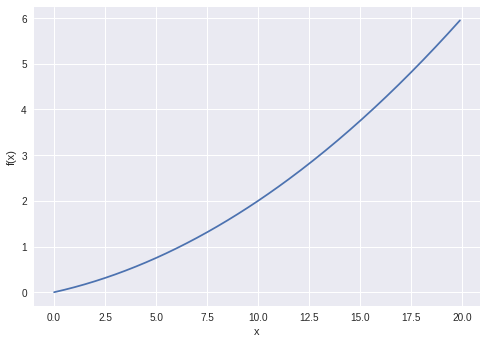

In [32]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) #0から20まで,0.1刻みのx配列
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [33]:
numerical_diff(function_1, 5)

0.1999999999990898

In [34]:
numerical_diff(function_1, 10)

0.2999999999986347

In [0]:
def function_2(x):
  return x[0]**2 + x[1]**2 #または return np.sum(x**2)

In [36]:
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [37]:
def function_tmp2(x1):
  return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [0]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x) #xと同じ形状の配列を生成
  
  for idx in range(x.size):
    tmp_val = x[idx]
    
    #f(x+h)の計算
    x[idx] = tmp_val + h
    fxh1 = f(x)
    
    #f(x-h)の計算
    x[idx] = tmp_val -h
    fxh2 = f(x)
    
    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val #値を元に戻す
    
  return grad

In [39]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [40]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [41]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [0]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x
  
  for i in range(step_num):
    grad = numerical_gradient(f,x)
    x -= lr * grad
    
  return x  

In [0]:
def function_2(x):
  return x[0]**2 + x[1]**2

In [44]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [45]:
#学習率が大きすぎる例:lr=10.0
init_x = np.array([-3.0, 4,0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12,  0.00000000e+00])

In [46]:
#学習率が小さすぎる例:lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [0]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3) #ガウス分布で初期化
    
  def predict(self, x):
    return np.dot(x, self.W)
  
  def loss(self, x,t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y,t)
    
    return loss

In [48]:
net = simpleNet()
print(net.W) #重みパラメータ

[[ 0.35237823  0.45775226 -0.58758483]
 [ 0.82410195 -0.45104261  2.07368771]]


In [49]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.95311869 -0.131287    1.51376804]


In [50]:
np.argmax(p) #最大値のインデックス

2

In [51]:
t = np.array([0, 0, 1]) #正解ラベル
net.loss(x,t)

0.5674931913616424

In [0]:
def f(W):
  return net.loss(x,t)

In [53]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.19418023  0.06565285 -0.25983309]
 [ 0.29127035  0.09847928 -0.38974963]]


In [0]:
f = lambda w: net.loss(x,t)
dW = numerical_gradient(f, net.W)

In [0]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient
import numpy as np

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    #重みの初期化
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)
      
  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']
    
    def sigmoid(x):
      return 1 / (1 + np.exp(-x))
      a1 = np.dot(x, W1) + b1
      z1 = sigmoid(a1)
      a2 = np.dot(z1, W2) + b2
      y = softmax(a2)
      
    return y
    
  #x:入力データ t:教師データ
  def loss(self, x, t):
    y = self,predict(x)
      
    return cross_entropy_error(y,t)
    
  def accuracy(self, x, t):
    y = predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)
      
    accuracy = np.sum( y == t) / float(x.shape[0])
    return accuracy
    
   #x:入力データ t:教師データ
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x,t)
      
    grads = {}
    
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
      
    return grads

In [56]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape

(784, 100)

In [57]:
net.params['b1'].shape

(100,)

In [58]:
net.params['W2'].shape

(100, 10)

In [59]:
net.params['b2'].shape

(10,)

In [60]:
from two_layer_net import TwoLayerNet
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

x = np.random.rand(100,784) #ダミーの入力データ(100枚分)
y = net.predict(x)

x = np.random.rand(100, 784) #ダミーの入力データ(100枚分)
t = np.random.rand(100,10) #ダミーの正解ラベル(100枚分)

grads = net.numerical_gradient(x, t) #勾配の計算

grads['W1'].shape

(784, 100)

In [61]:
grads['b1'].shape

(100,)

In [62]:
grads['W2'].shape

(100, 10)

In [63]:
grads['b2'].shape

(10,)

In [0]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_loss_list = []

#ハイパーパラメータ
iters_num = 10000
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  #ミニバッチの取得
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]
  
  #勾配の計算
  grad = network.numerical_gradient(x_batch, t_batch) #grad = network.gradient(x_batch, t_batch) #高速版
  
  #パラメータの更新
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]
    
  #学習経過の記録
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

In [67]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet
import tqdm

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []
#1エポックあたりの繰り返し数
iter_per_epoch = max(train_size / batch_size, 1)

#ハイパーパラメータ
iters_num = 10000
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in tqdm.tqdm(range(iters_num)):
  #ミニバッチの取得
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]
  
  #勾配の計算
  grad = network.numerical_gradient(x_batch, t_batch) #grad = network.gradient(x_batch, t_batch) #高速版!
  
  #パラメータの更新
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]
    
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)
  
  #1エポックごとに認識精度を計算
  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

  0%|          | 0/10000 [00:00<?, ?it/s]

AxisError: ignored

In [1]:
#cd /content

/content
